# Count time-based keyword frequency

To draw daily line chart on a web page, we need to count date-based frequency.

    The data format for the line chart is as follows.

    [{'x': '2020-03-05', 'y': 1},
    {'x': '2020-03-06', 'y': 0},
    {'x': '2020-03-07', 'y': 0},
    {'x': '2020-03-08', 'y': 0},
    {'x': '2020-03-09', 'y': 0},
    {'x': '2020-03-10', 'y': 5},
    {'x': '2020-03-11', 'y': 5},
    {'x': '2020-03-12', 'y': 7},
    {'x': '2020-03-13', 'y': 62},
    {'x': '2020-03-14', 'y': 29}]

# Load data

In [40]:
import pandas as pd
from datetime import datetime,timedelta

In [41]:
df = pd.read_csv('./yahoo_news_preprocessed.csv',sep='|')

In [42]:
df.head(1)

,item_id,date,category,title,content,sentiment,summary,top_key_freq,tokens,tokens_v2,entities,token_pos,link,photo_link
0,_20250327_1,2025-03-27,焦點,台股重挫308點 失守22000關卡,美國總統川普準備徵收汽車關稅，美股主要指數全數下跌，台積電重挫4.09%，台積電台北現股今日...,暫無,暫無,"[('台積電', 4), ('指數', 3), ('月線', 3), ('美國', 2), ...","['美國', '總統', '川普', '準備', '徵收', '汽車', '關稅', '，'...","['美國', '總統', '川普', '汽車', '關稅', '美股', '指數', '台積...","[NerToken(word='美國', ner='GPE', idx=(0, 2)), N...","[('美國', 'Nc'), ('總統', 'Na'), ('川普', 'Nb'), ('準...",https://tw.news.yahoo.com/https://tw.stock.yah...,https://s.yimg.com/ny/api/res/1.2/3qEveVGKp070...


# Filter data using token_v2 or content column

In [43]:
from datetime import datetime, timedelta
# Searching keywords from "content" column
# Here this function uses df.content column, while filter_dataFrame() uses df.tokens_v2
def filter_dataFrame(user_keywords, cond, cate, weeks):

    # end date: the date of the latest record of news
    end_date = df.date.max()
    
    # start date
    start_date = (datetime.strptime(end_date, '%Y-%m-%d').date() - timedelta(weeks=weeks)).strftime('%Y-%m-%d')

    # (1) proceed filtering: a duration of a period of time
    # 期間條件
    period_condition = (df.date >= start_date) & (df.date <= end_date) 
    
    # (2) proceed filtering: news category
    # 新聞類別條件
    if (cate == "全部"):
        condition = period_condition  # "全部"類別不必過濾新聞種類
    else:
        # category新聞類別條件
        condition = period_condition & (df.category == cate)

    # (3) proceed filtering: keywords 
    # and or 條件
    if (cond == 'and'):
        # query keywords condition使用者輸入關鍵字條件and
        condition = condition & df.content.apply(lambda text: all((qk in text) for qk in user_keywords)) #寫法:all()
    elif (cond == 'or'):
        # query keywords condition使用者輸入關鍵字條件
        condition = condition & df.content.apply(lambda text: any((qk in text) for qk in user_keywords)) #寫法:any()
    # condiction is a list of True or False boolean value
    df_query = df[condition]

    return df_query


### Now we do filtering news

In [44]:
# user_keywords=['肺炎','冠狀','疫情']
# cond='and'
# cate='全部'
# weeks=4
# df_query = filter_dataFrame(user_keywords, cond, cate, weeks)

In [45]:
user_keywords=['川普','美國']
cond='or'
cate='全部'
weeks=4
df_query = filter_dataFrame(user_keywords, cond, cate, weeks)
len(df_query)

69

In [46]:
df_query.head(1)

,item_id,date,category,title,content,sentiment,summary,top_key_freq,tokens,tokens_v2,entities,token_pos,link,photo_link
0,_20250327_1,2025-03-27,焦點,台股重挫308點 失守22000關卡,美國總統川普準備徵收汽車關稅，美股主要指數全數下跌，台積電重挫4.09%，台積電台北現股今日...,暫無,暫無,"[('台積電', 4), ('指數', 3), ('月線', 3), ('美國', 2), ...","['美國', '總統', '川普', '準備', '徵收', '汽車', '關稅', '，'...","['美國', '總統', '川普', '汽車', '關稅', '美股', '指數', '台積...","[NerToken(word='美國', ner='GPE', idx=(0, 2)), N...","[('美國', 'Nc'), ('總統', 'Na'), ('川普', 'Nb'), ('準...",https://tw.news.yahoo.com/https://tw.stock.yah...,https://s.yimg.com/ny/api/res/1.2/3qEveVGKp070...


# All-in-one function: Get time-based keyword frequency

In [47]:
def get_keyword_time_based_freq(df_query):
    date_samples = df_query.date
    query_freq = pd.DataFrame({'date_index':pd.to_datetime( date_samples ),'freq':[1 for _ in range(len(df_query))]})
    data = query_freq.groupby(pd.Grouper(key='date_index',freq='D')).sum()
    time_data=[]
    for i, date_idx in enumerate(data.index):
        row = {'x':date_idx.strftime('%Y-%m-%d'),'y':int(data.iloc[i].freq)}
        time_data.append(row)
    return time_data

In [48]:
user_keywords=['川普','美國']
cond='or'
cate='全部'
weeks=4
df_query = filter_dataFrame(user_keywords, cond, cate, weeks)
len(df_query)

69

In [49]:
result = get_keyword_time_based_freq(df_query)

In [50]:
result

[{'x': '2025-03-24', 'y': 1},
 {'x': '2025-03-25', 'y': 0},
 {'x': '2025-03-26', 'y': 6},
 {'x': '2025-03-27', 'y': 62}]

In [51]:
len(result)

4

# Demonstration step by step

# Time-based frequency

    We need the daily frequency data:

    [{'x': '2020-02-24', 'y': 1},
    {'x': '2020-02-25', 'y': 0},
    {'x': '2020-02-26', 'y': 1},
    {'x': '2020-02-27', 'y': 1},
    {'x': '2020-02-28', 'y': 0},
    {'x': '2020-02-29', 'y': 0},
    {'x': '2020-03-01', 'y': 0},
    {'x': '2020-03-02', 'y': 2},
    {'x': '2020-03-03', 'y': 1}]

## Assign frequency value of 1 to each news

        date_index  freq
    0	2020-03-20	1
    1	2020-03-20	1
    2	2020-03-13	1
    3	2020-03-19	1
    4	2020-03-17	1

In [52]:
# done with one line:
query_freq = pd.DataFrame({'date_index':pd.to_datetime( df_query.date ),'freq':[1 for _ in range(len(df_query))]})

In [53]:
query_freq

,date_index,freq
0,2025-03-27,1
1,2025-03-27,1
3,2025-03-27,1
8,2025-03-27,1
9,2025-03-27,1
...,...,...
197,2025-03-27,1
198,2025-03-27,1
204,2025-03-27,1
207,2025-03-27,1


### How to make it?

In [54]:
{'key':['one','two','three'], 'value':[1,2,3]}

{'key': ['one', 'two', 'three'], 'value': [1, 2, 3]}

In [55]:
pd.DataFrame({'key':['one','two','three'], 'value':[1,2,3]})

,key,value
0,one,1
1,two,2
2,three,3


In [56]:
{'date_index':pd.to_datetime( df_query.date ),'freq':[1 for _ in range(len(df_query))]}

{'date_index': 0     2025-03-27
 1     2025-03-27
 3     2025-03-27
 8     2025-03-27
 9     2025-03-27
          ...    
 197   2025-03-27
 198   2025-03-27
 204   2025-03-27
 207   2025-03-27
 215   2025-03-27
 Name: date, Length: 69, dtype: datetime64[ns],
 'freq': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]}

In [57]:
df_query.date # date is string format

0      2025-03-27
1      2025-03-27
3      2025-03-27
8      2025-03-27
9      2025-03-27
          ...    
197    2025-03-27
198    2025-03-27
204    2025-03-27
207    2025-03-27
215    2025-03-27
Name: date, Length: 69, dtype: object

In [58]:
# convert to datetime format
pd.to_datetime( df_query.date )

0     2025-03-27
1     2025-03-27
3     2025-03-27
8     2025-03-27
9     2025-03-27
         ...    
197   2025-03-27
198   2025-03-27
204   2025-03-27
207   2025-03-27
215   2025-03-27
Name: date, Length: 69, dtype: datetime64[ns]

In [59]:
[1 for _ in range(len(df_query))]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [60]:
# dict format 
{'date_index':pd.to_datetime( df_query.date ),'freq':[1 for _ in range(len(df_query))]}

{'date_index': 0     2025-03-27
 1     2025-03-27
 3     2025-03-27
 8     2025-03-27
 9     2025-03-27
          ...    
 197   2025-03-27
 198   2025-03-27
 204   2025-03-27
 207   2025-03-27
 215   2025-03-27
 Name: date, Length: 69, dtype: datetime64[ns],
 'freq': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]}

In [61]:
# conver to dataframe
pd.DataFrame({'date_index':pd.to_datetime( df_query.date ),'freq':[1 for _ in range(len(df_query))]})

,date_index,freq
0,2025-03-27,1
1,2025-03-27,1
3,2025-03-27,1
8,2025-03-27,1
9,2025-03-27,1
...,...,...
197,2025-03-27,1
198,2025-03-27,1
204,2025-03-27,1
207,2025-03-27,1


In [62]:
query_freq = pd.DataFrame({'date_index':pd.to_datetime( df_query.date ),'freq':[1 for _ in range(len(df_query))]})

## Daily frequency

### We use pd.Grouper(). It is very powerful.

In [63]:
query_freq.groupby(pd.Grouper(key='date_index',freq='D')).sum()

,freq
date_index,
2025-03-24,1
2025-03-25,0
2025-03-26,6
2025-03-27,62


In [64]:
pd.Grouper(key='date_index',freq='D')

TimeGrouper(key='date_index', freq=<Day>, axis=0, sort=True, dropna=True, closed='left', label='left', how='mean', convention='e', origin='start_day')

In [65]:
query_freq.groupby(pd.Grouper(key='date_index',freq='W')).sum()

,freq
date_index,
2025-03-30,69


## Week-based frequency

In [66]:
query_freq.groupby(pd.Grouper(key='date_index',freq='W')).sum()

,freq
date_index,
2025-03-30,69


## draw freqency line chart

In [67]:
# data = query_freq.groupby(pd.Grouper(key='date_index',freq='D')).sum()[['freq']]
data = query_freq.groupby(pd.Grouper(key='date_index',freq='D')).sum()[['freq']]

In [68]:
data

,freq
date_index,
2025-03-24,1
2025-03-25,0
2025-03-26,6
2025-03-27,62


In [69]:
type(data)

pandas.core.frame.DataFrame

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

<Axes: xlabel='date_index'>

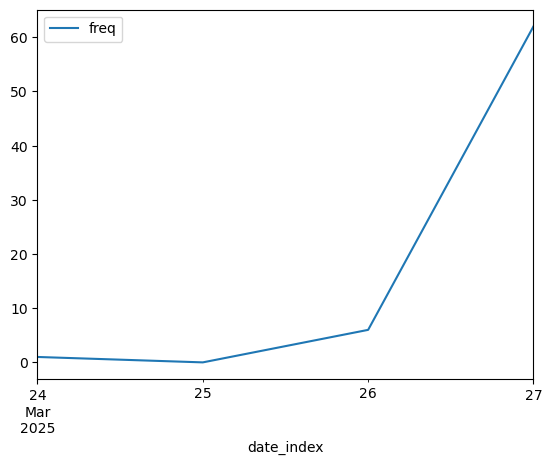

In [71]:
data.plot()

## Prepare data format for JavaScrip line chart on Django website

In [72]:
data.head(2)

,freq
date_index,
2025-03-24,1
2025-03-25,0


In [73]:
time_data=[]
for i, date_idx in enumerate(data.index):
    row = {'x':date_idx.strftime('%Y-%m-%d'),'y':int(data.iloc[i].freq)}
    time_data.append(row)

In [74]:
time_data

[{'x': '2025-03-24', 'y': 1},
 {'x': '2025-03-25', 'y': 0},
 {'x': '2025-03-26', 'y': 6},
 {'x': '2025-03-27', 'y': 62}]

# All-in-one function: Get time-based keyword frequency

# views.py for app_user_keyword